In [1]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.simple import SimpleMLAgent
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [45]:
def createDf(output):
    agents = ['RandomAgent','SimpleML','GreedyAgent']
    scenarios = ['Test1v1', 'Test2v2', 'Junction','JunctionExo']
    all_json=[]
    for i in range(0, 100):
        for s in scenarios:
            for agentRed, agentBlue in product(agents, agents):
                file_name=f'{output}/{agentRed}_{agentBlue}_{s}_{i}.json'
                data=json.load(open(file_name))
                all_json.append(data)  
    df=pd.DataFrame(all_json)
    return df

In [20]:
def addWinnerColumn(df):
    winner_agent=[]
    for i in range(len(df)):
        if ((df["teamRed"][i] == "SimpleML") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "SimpleML") & (df["winner"][i]=="blue")):
            winner_agent.append("SimpleML")
        elif ((df["teamRed"][i] == "RandomAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RandomAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RandomAgent")
        elif ((df["teamRed"][i] == "GreedyAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "GreedyAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("GreedyAgent")
    return winner_agent


    

In [55]:
dfAll=createDf("outputAll")

In [48]:
dfGreedy=createDf("outputGreedy")

In [50]:
dfGreedyRandom=createDf("outputRandomGreedy")

In [21]:
df["winnerAgent"]=addWinnerColumn(df)

In [24]:
def matchesWonForEachAgent(df):
    df['winnerAgent'].value_counts().plot.bar(title='games won for each agent')
    print('Percentuale vincita SimpleML:',len(df[df['winnerAgent']=="SimpleML"])/len(df))
    print('Percentuale vincita RandomAgent:',len(df[df['winnerAgent']=="RandomAgent"])/len(df))
    print('Percentuale vincita GreedyAgent:',len(df[df['winnerAgent']=="GreedyAgent"])/len(df))

In [28]:
def agentVSagent(df,agent1,agent2):
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} su {agent2}')
    print(f'Percentuale vincita {agent1} su {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(len(departments), figsize=(8,15))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=dd['winnerAgent'].value_counts(),x=dd['winnerAgent'].unique() ,ax=ax[i])
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(f'Percentuale vincita {agent1} su {agent2} su scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


In [38]:
def agentVSagentColor(df,agent1,agent2,coloragent1):
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentuale vincita {agent1} Red su {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Red su {agent2} Blue su scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentuale vincita {agent1} Blue su {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Blue su {agent2} Red su scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(len(departments), figsize=(8,15))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario



Percentuale vincita SimpleML su RandomAgent: 0.5033333333333333
Percentuale vincita SimpleML su RandomAgent su scenario Test1v1: 0.555
Percentuale vincita SimpleML su RandomAgent su scenario Test2v2: 0.455
Percentuale vincita SimpleML su RandomAgent su scenario Junction: 0.5


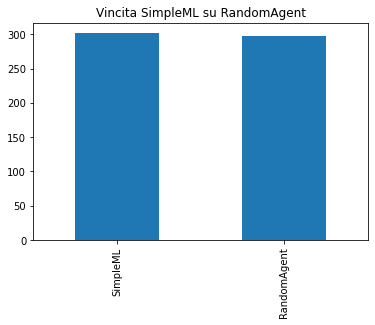

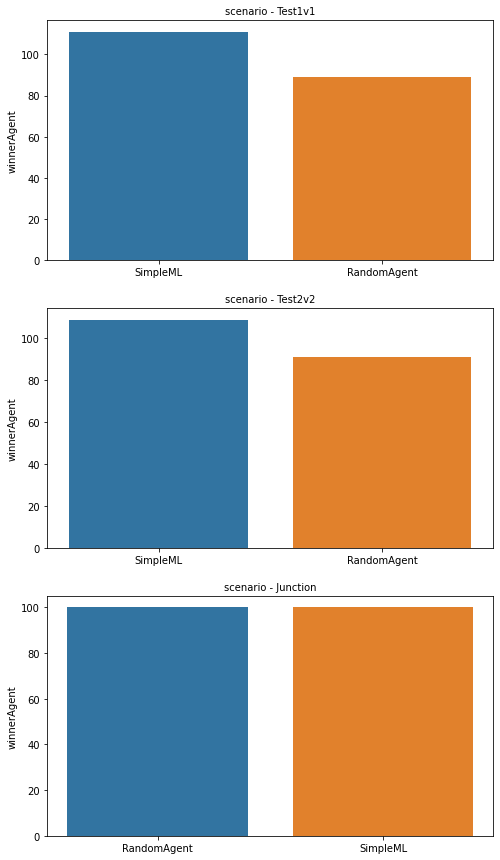

In [31]:
agentVSagent(df,"SimpleML","RandomAgent")

Percentuale vincita SimpleML Blue su GreedyAgent Red: 0.5866666666666667
Percentuale vincita SimpleML Blue su GreedyAgent Red su scenario  Test1v1 0.74
Percentuale vincita SimpleML Blue su GreedyAgent Red su scenario  Test2v2 0.72
Percentuale vincita SimpleML Blue su GreedyAgent Red su scenario  Junction 0.3


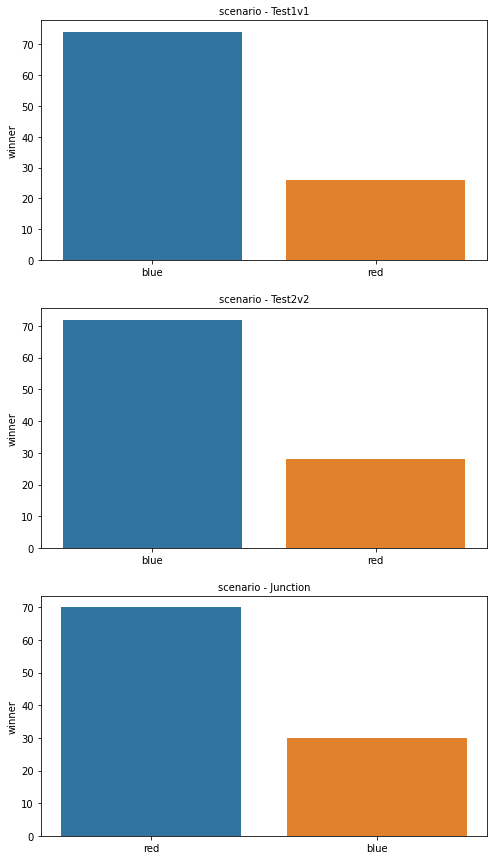

In [40]:
agentVSagentColor(df,"SimpleML","GreedyAgent","blue")

Percentuale vincita SimpleML: 0.2896296296296296
Percentuale vincita RandomAgent: 0.2803703703703704
Percentuale vincita GreedyAgent: 0.43


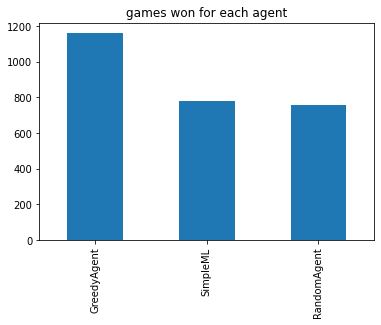

In [25]:
matchesWonForEachAgent(df)